In [59]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [37]:
# Read dataset
online = pd.read_csv('././event-processing-db/RFM/data.csv', encoding = "ISO-8859-1")
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
online['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [39]:
online.shape

(541909, 8)

In [40]:
online[online['CustomerID'].isnull()].shape

(135080, 8)

In [41]:
online.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [42]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [43]:
online['TotalSum'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalSum, dtype: float64

In [44]:
snapshot_date = online['InvoiceDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [47]:
online.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSum'],
      dtype='object')

In [50]:
online[['InvoiceNo','CustomerID','InvoiceDate', 'TotalSum']].head()

,InvoiceNo,CustomerID,InvoiceDate,TotalSum
0,536365,17850.0,2010-12-01 08:26:00,15.30
1,536365,17850.0,2010-12-01 08:26:00,20.34
2,536365,17850.0,2010-12-01 08:26:00,22.00
3,536365,17850.0,2010-12-01 08:26:00,20.34
4,536365,17850.0,2010-12-01 08:26:00,20.34


In [61]:
#Grouping by CustomerID
data_process = online.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})
data_process

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [62]:
# Rename the columns
data_process.rename(columns={'InvoiceDate': 'Recency',
                             'InvoiceNo': 'Frequency',
                             'TotalSum': 'MonetaryValue'}, inplace=True)

In [63]:
print(data_process.head())
print(f'{data_process.shape[0]} rows, {data_process.shape[1]}: columns')

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
4372 rows, 3: columns


/home/chile/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chile/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chile/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

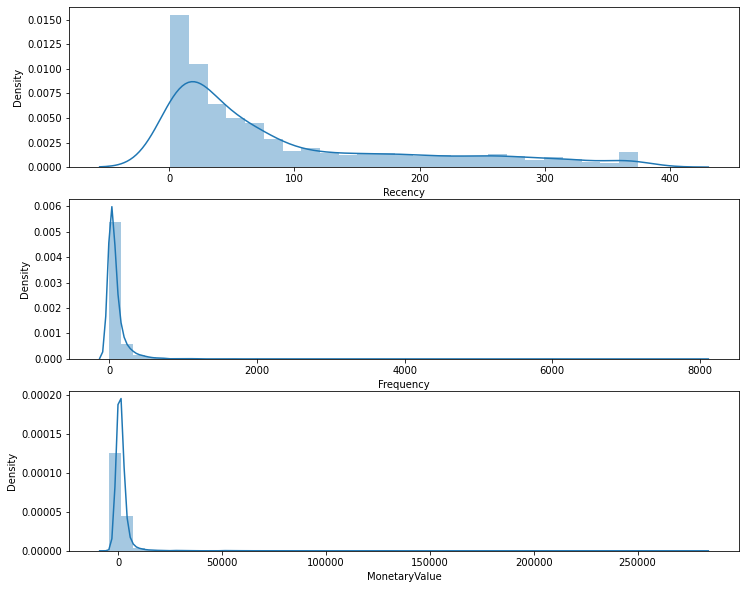

In [64]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1); sn.distplot(data_process['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sn.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sn.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [67]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_lables = range(1, 5)
r_groups= pd.qcut(data_process['Recency'], q=4, labels=r_labels)
r_groups.head()

CustomerID
12346.0    1
12347.0    4
12348.0    2
12349.0    3
12350.0    1
Name: Recency, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [68]:
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_lables)

# Create new columns R and F
data_process = data_process.assign(R = r_groups.values, F=f_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [69]:
# Create labels for MenetaryValue
m_labels = range(1,5)

m_groups = pd.qcut(data_process['MonetaryValue'], q = 4, labels=m_labels)

# Create new column M
data_process = data_process.assign(M= m_groups.values)

In [70]:
data_process

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [72]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [73]:
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [76]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique)

RFM_Segment_Concat
111    1
112    1
113    1
114    1
121    1
      ..
434    1
441    1
442    1
443    1
444    1
Name: RFM_Segment_Concat, Length: 62, dtype: int64


In [78]:
rfm['RFM_Score'] = rfm[['R', 'F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerID
12346.0     3.0
12347.0    12.0
12348.0     8.0
12349.0    10.0
12350.0     4.0
Name: RFM_Score, dtype: float64


In [79]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can \'t Loose Them'
    elif ((df['RFM_Score'] >= 8 ) and (df['RFM_Score'] < 9 )):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7 and (df['RFM_Score'] < 8 ))):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [80]:
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0,Require Activation
12347.0,2,182,4310.00,4,4,4,444,12.0,Can 't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8.0,Champions
12349.0,19,73,1757.55,3,3,4,334,10.0,Can 't Loose Them
12350.0,310,17,334.40,1,1,2,112,4.0,Needs Attention


In [81]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can 't Loose Them     25.2     195.1        4130.3  1690
Champions             62.7      57.0         974.7   467
Loyal                 78.8      39.7         724.2   447
Needs Attention      174.5      13.9         227.1   391
Potential             94.3      28.5         491.8   468
Promising            153.0      21.2         346.8   517
Require Activation   264.8       7.8         109.1   392


NameError: name 'squarify' is not defined

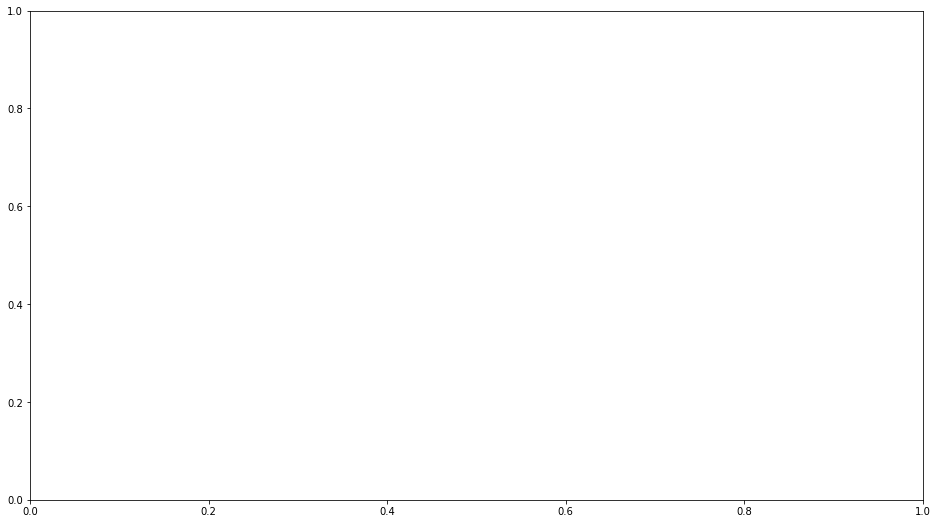